# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

In [24]:
# Method 1

import matplotlib.pyplot as plt
import seaborn as sns



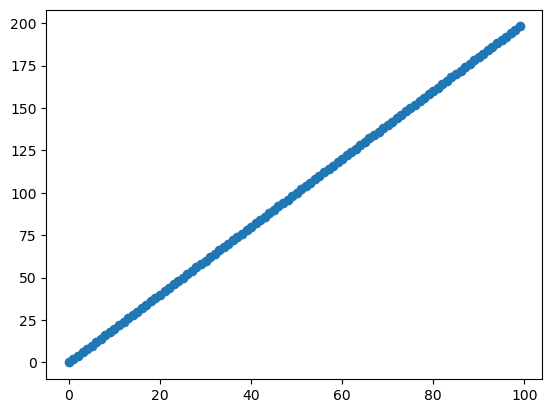

In [10]:
plt.plot(x,y, "o-")
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

In [ ]:
# Method 2

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

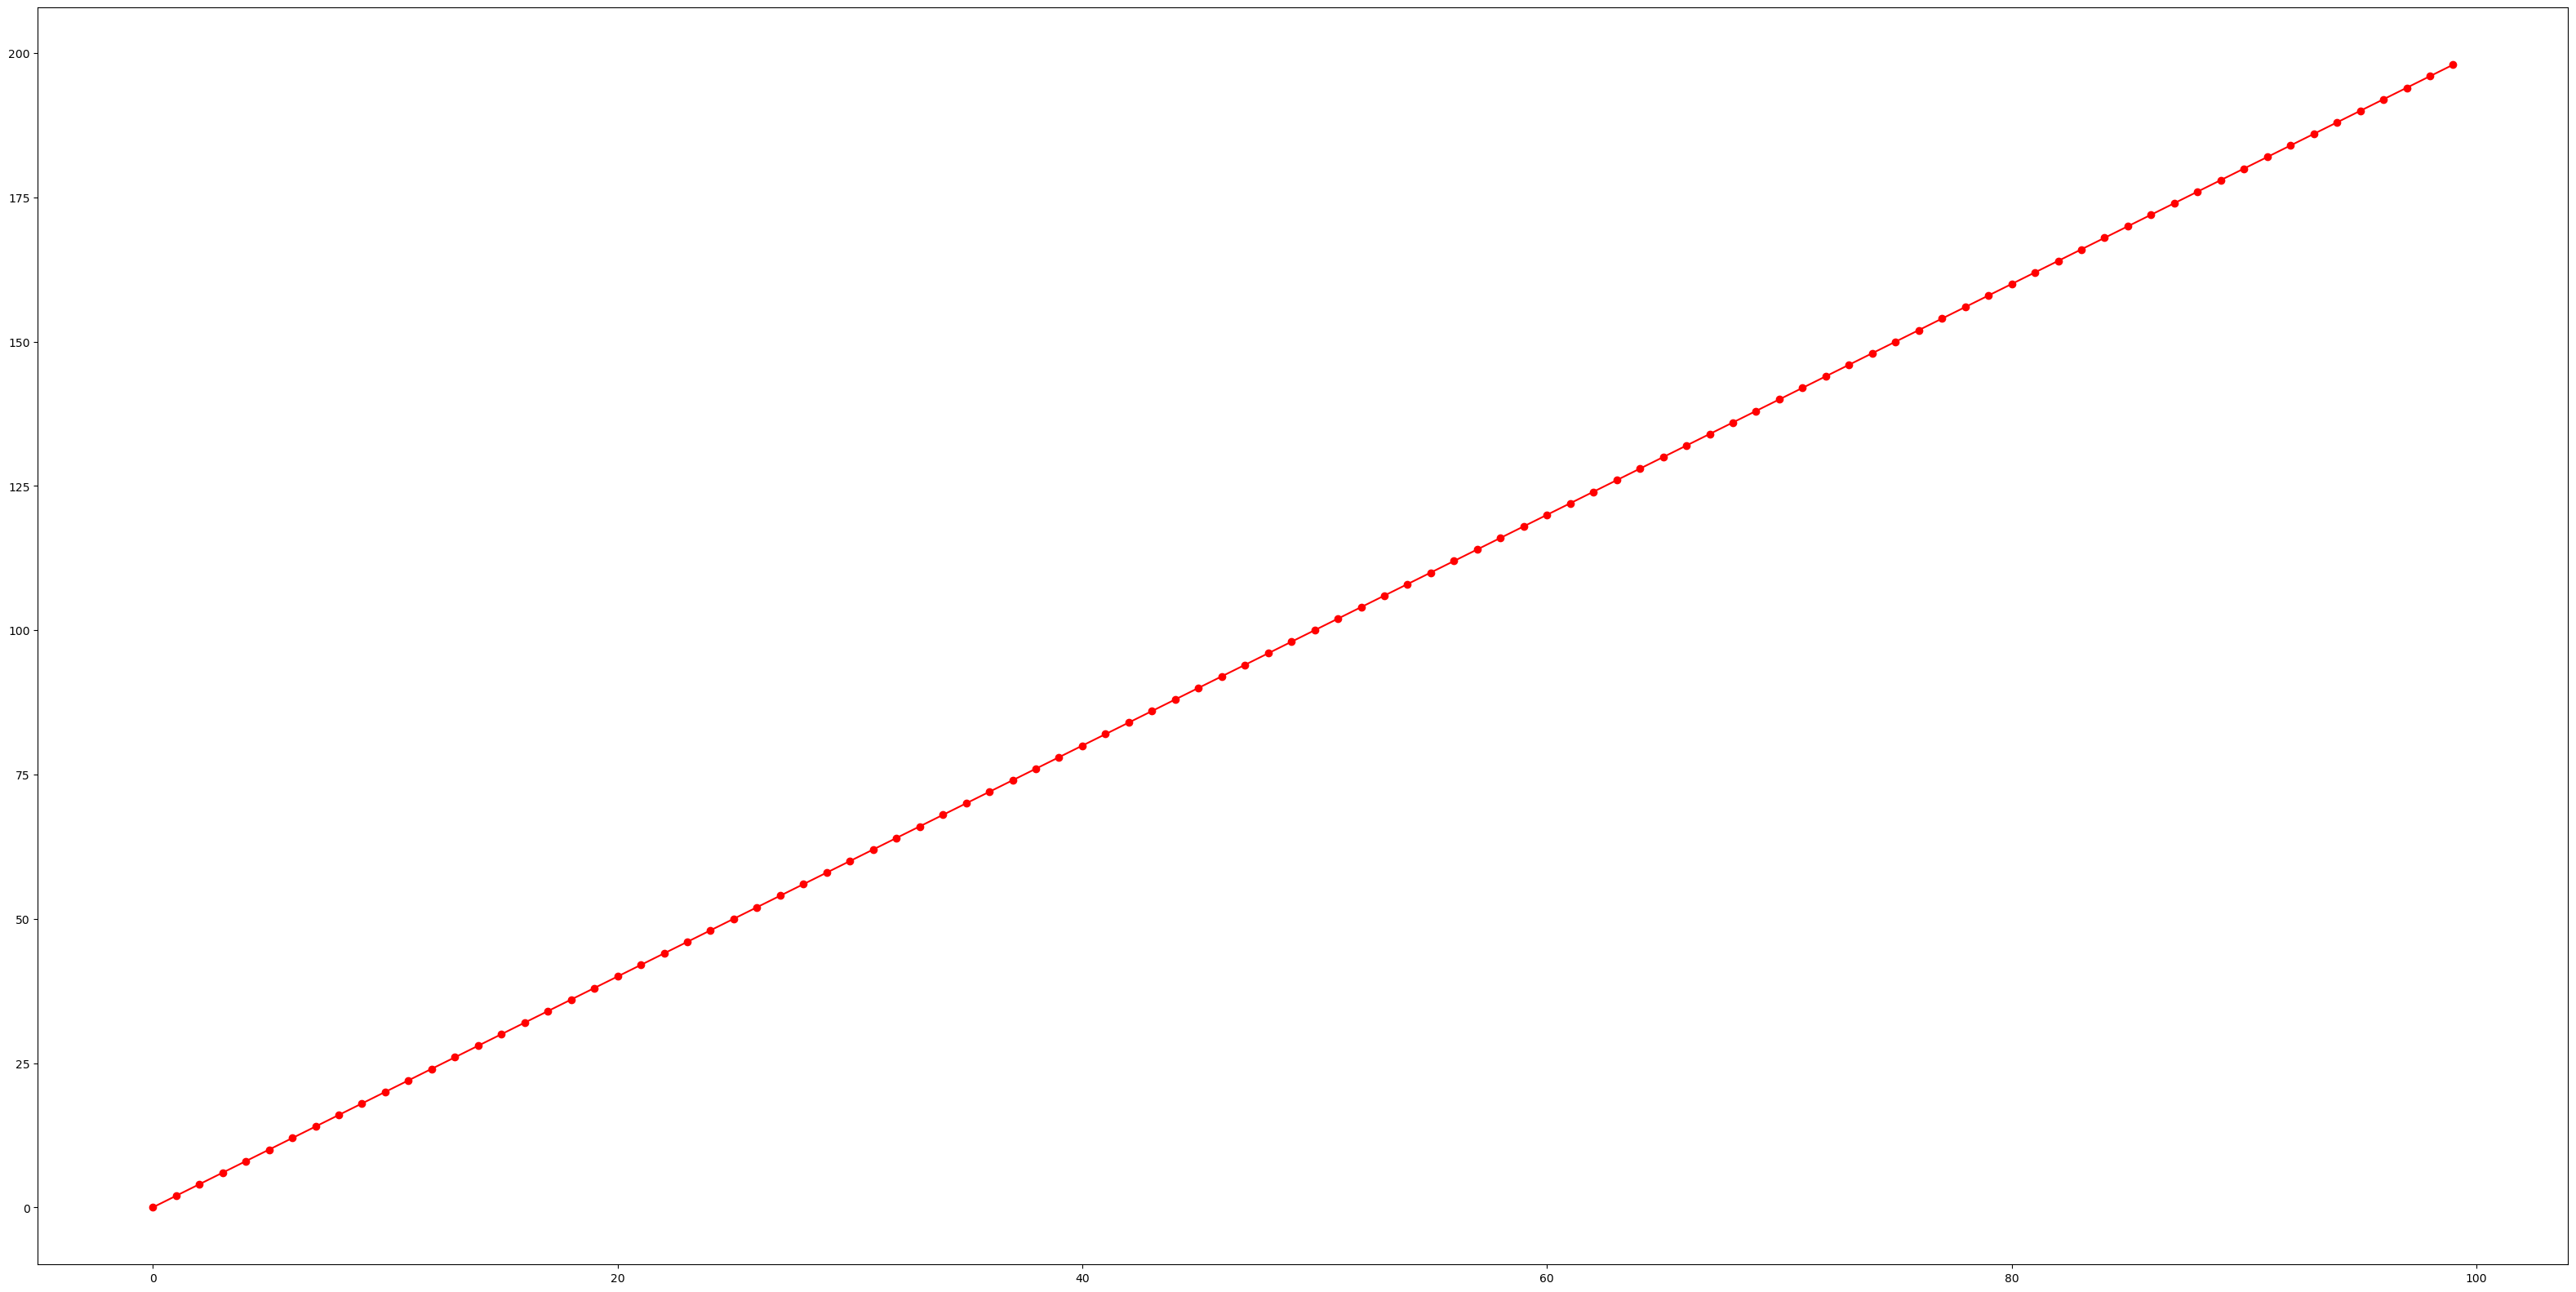

In [12]:
# your code here
plt.figure(figsize=(40,20))
plt.plot(x,y, "ro-")
plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

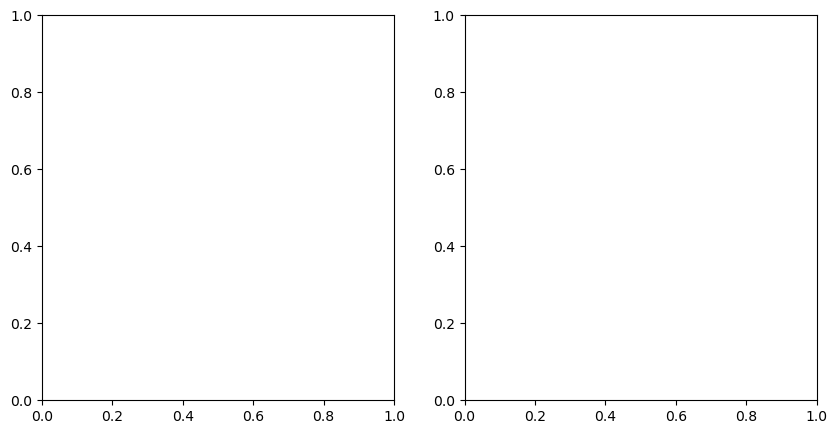

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

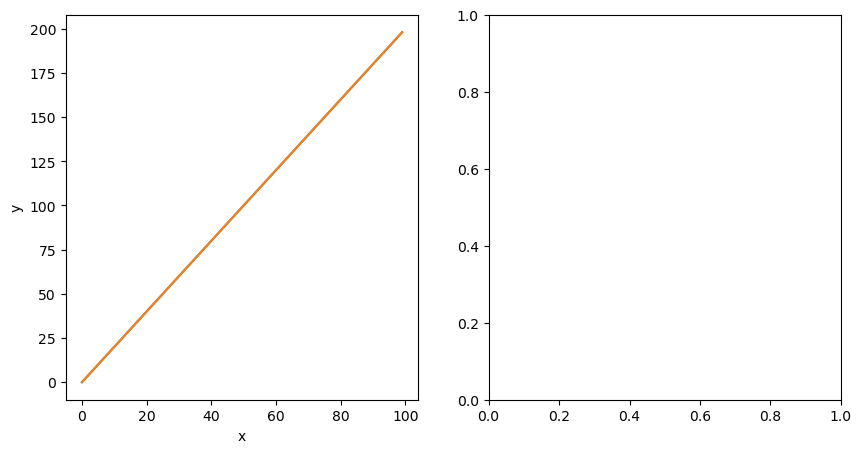

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(x, y, label='y = x^2')
ax1.plot(x, y, label='y = e^x')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()

Text(0, 0.5, 'y')

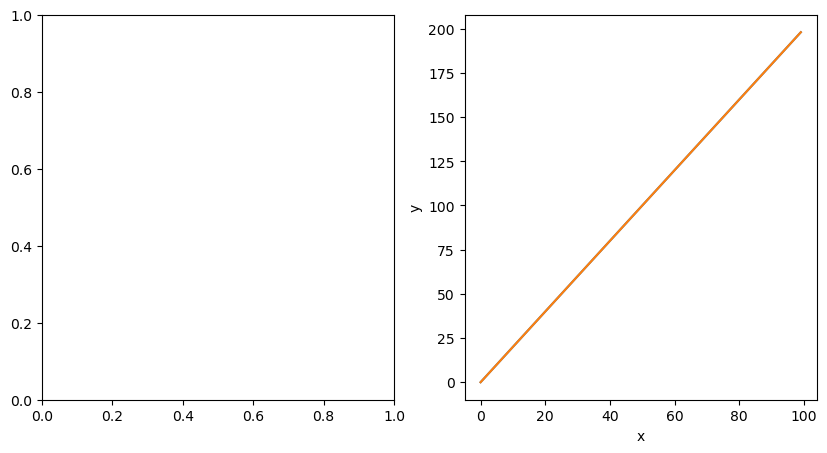

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax2.plot(x, y, label='y = x^2')
ax2.plot(x, y, label='y = e^x')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

#### As a bonus challenge, try to add a legend to the plot.

In [ ]:
# your code here

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [7]:
import pandas as pd

In [9]:
fitbit = pd.read_csv("/Users/ricardomendes/Downloads/fitbit2.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [ ]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here





# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here

fitbit['Weekday'] = pd.to_datetime(fitbit['Date']).dt.dayofweek < 5
steps_by_day = fitbit.groupby('Weekday')['Steps'].median()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os


In [17]:
fitbit['Month'] = pd.to_datetime(fitbit['Date']).dt.month
steps_by_month = fitbit.groupby('Month')['Steps'].median()
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded,Month
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5,5


In [18]:
fitbit['Weekday'] = pd.to_datetime(fitbit['Date']).dt.dayofweek < 5
steps_by_day = fitbit.groupby('Weekday')['Steps'].median()
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded,Month,Weekday
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5,5,True
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5,5,False
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5,5,False
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5,5,True
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5,5,True


#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [ ]:
# your code here

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [2]:
# your code here
titanic = pd.read_csv("/Users/ricardomendes/Downloads/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [3]:
print(titanic.dtypes)

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [4]:
# NUMERICAL VARIABLES
# your code here

num_vars = titanic.select_dtypes(include=['int64', 'float64'])
print('Numerical variables:')
print(num_vars.columns)

Numerical variables:
Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [5]:
# CATEGORICAL VARIABLES
# your code here

cat_vars = titanic.select_dtypes(include=['object'])
print('\nCategorical variables:')
print(cat_vars.columns)


Categorical variables:
Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [7]:
# your code here

sns.set_style("darkgrid")

plt.figure(figsize=(12,6))
plt.show()

<Figure size 1200x600 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

<Axes: xlabel='Age', ylabel='Count'>

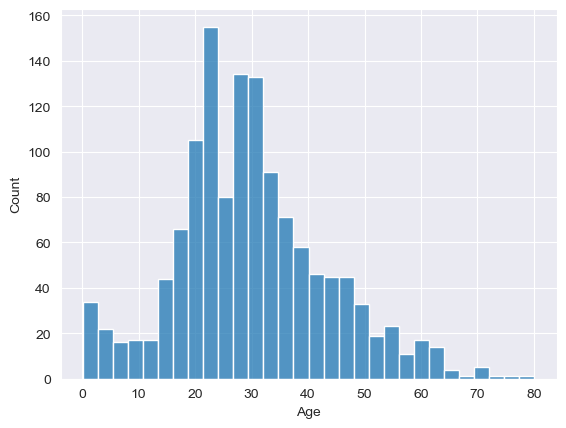

In [8]:
# your code here

sns.histplot(data=titanic, x='Age')

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

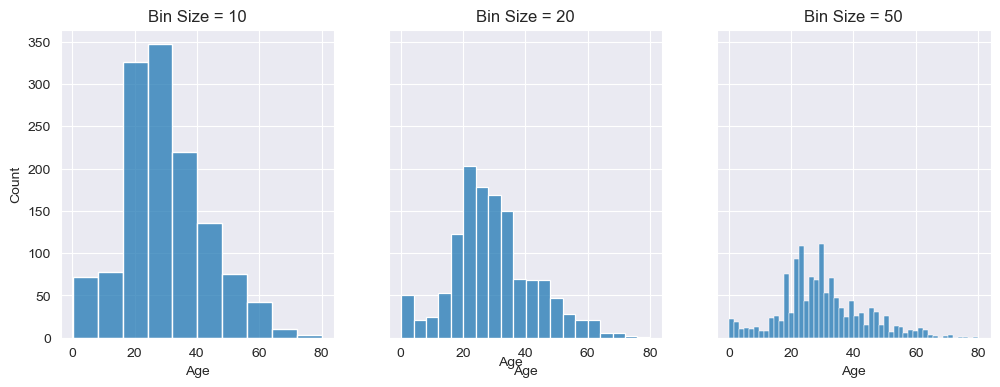

In [10]:
# your code here

sns.set_style('darkgrid')

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

sns.histplot(titanic['Age'], bins=10, ax=axes[0])
sns.histplot(titanic['Age'], bins=20, ax=axes[1])
sns.histplot(titanic['Age'], bins=50, ax=axes[2])

axes[0].set_title('Bin Size = 10')
axes[1].set_title('Bin Size = 20')
axes[2].set_title('Bin Size = 50')

fig.text(0.5, 0.04, 'Age', ha='center')

axes[0].set_ylabel('Count')

plt.show()

#### How does the bin size affect your plot?

In [ ]:
"""
your comments here
"""

#### Use seaborn to show the distribution of column `Age`.

Text(0.5, 1.0, 'Distribution of Age')

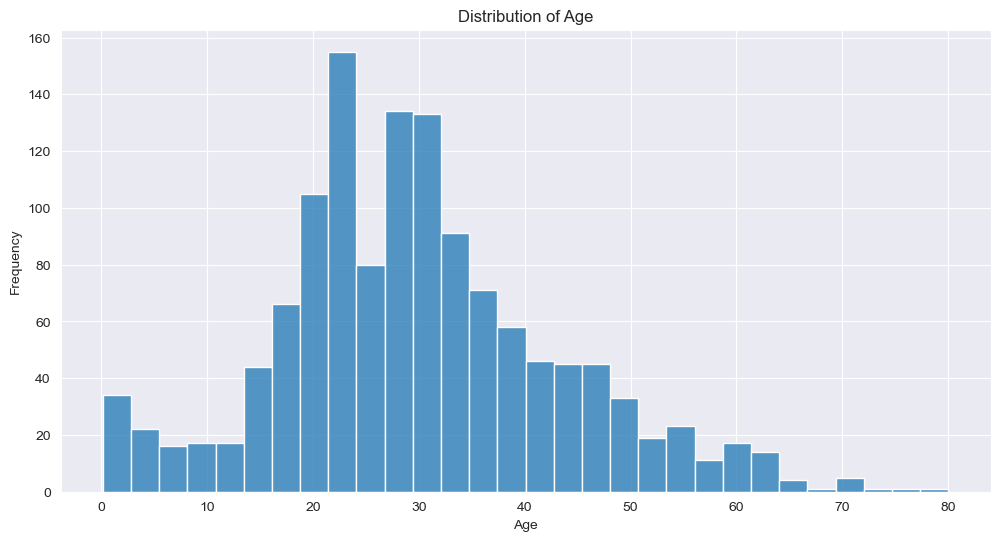

In [14]:
# your code here
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))

sns.histplot(data=titanic, x='Age')

arkgridarkgrid
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

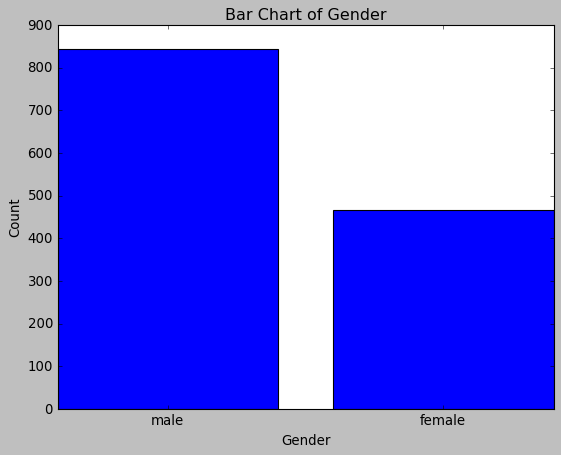

In [16]:
# Method 1 - matplotlib
# your code here

plt.style.use('classic')
gender_counts = titanic['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Bar Chart of Gender')
plt.show()

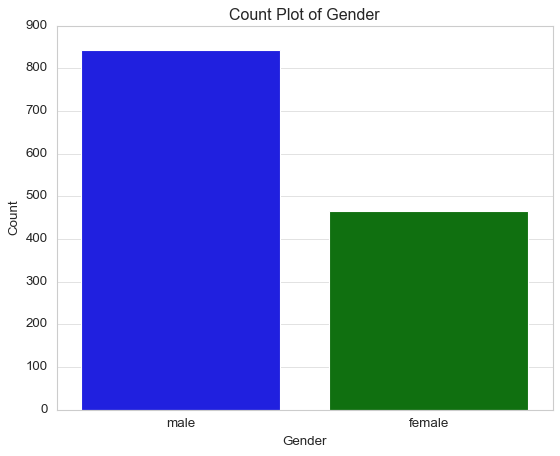

In [29]:
# Method 2 - seaborn
# your code here

sns.set_style('whitegrid')
sns.countplot(data=titanic, x='Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count Plot of Gender')
plt.show()

#### Use the right plot to visualize the column `Pclass`.

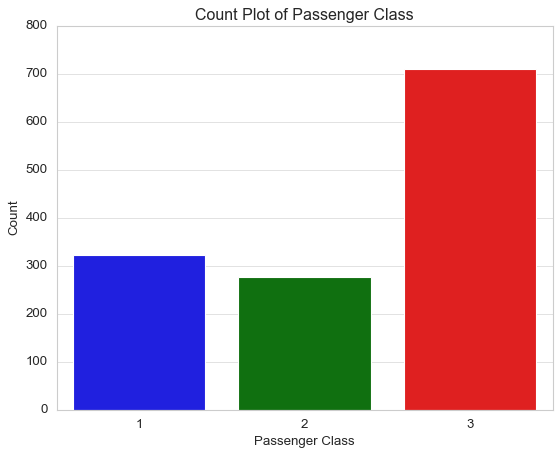

In [30]:
# your code here

sns.set_style('whitegrid')

# Create a count plot of the Pclass column using seaborn
sns.countplot(data=titanic, x='Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Count Plot of Passenger Class')
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

/var/folders/x_/gqqzk9dd5sl0z0d9jj31zd280000gn/T/ipykernel_978/3036317960.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


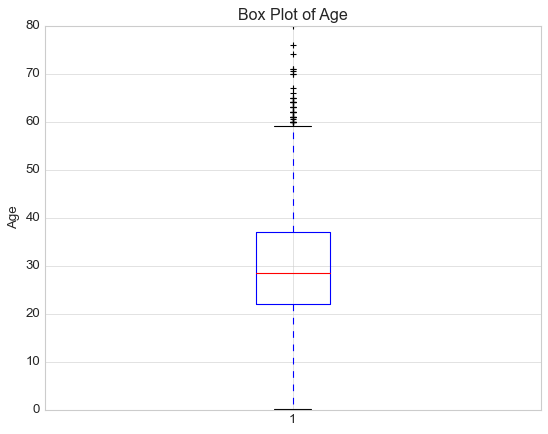

In [17]:
# your code here

plt.style.use('seaborn-whitegrid')

plt.boxplot(titanic['Age'].dropna())
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.show()

In [ ]:
"""
your comments here
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [1]:
# your code here


#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

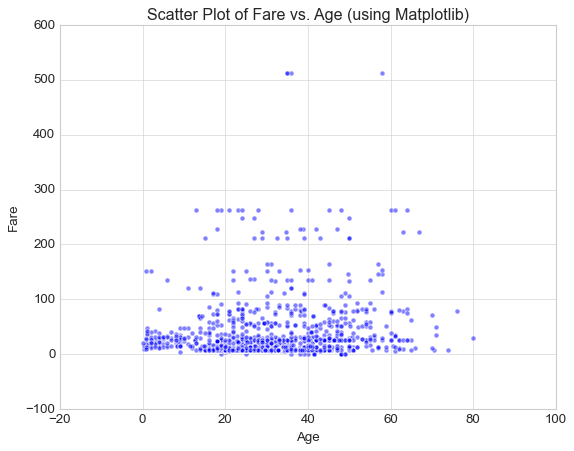

In [34]:
# Method 1 - matplotlib
# your code here

plt.scatter(x=titanic['Age'], y=titanic['Fare'], alpha=0.5)
plt.title('Scatter Plot of Fare vs. Age (using Matplotlib)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

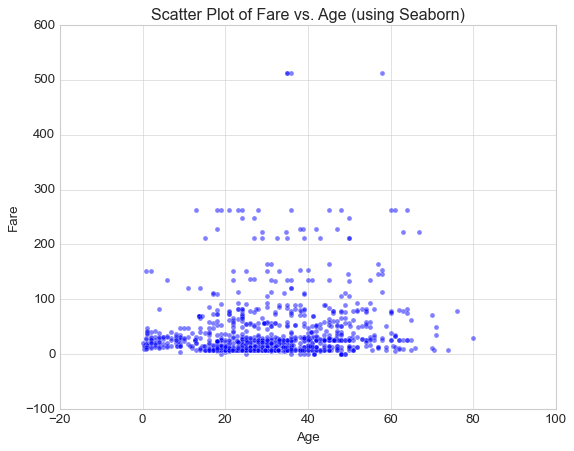

In [33]:
# Method 2 - seaborn
# your code here

sns.set_style('whitegrid')
sns.scatterplot(data=titanic, x='Age', y='Fare', alpha=0.5)
plt.title('Scatter Plot of Fare vs. Age (using Seaborn)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

#### Plot the correlation matrix using seaborn.

/var/folders/x_/gqqzk9dd5sl0z0d9jj31zd280000gn/T/ipykernel_43785/3696335649.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = titanic.corr()


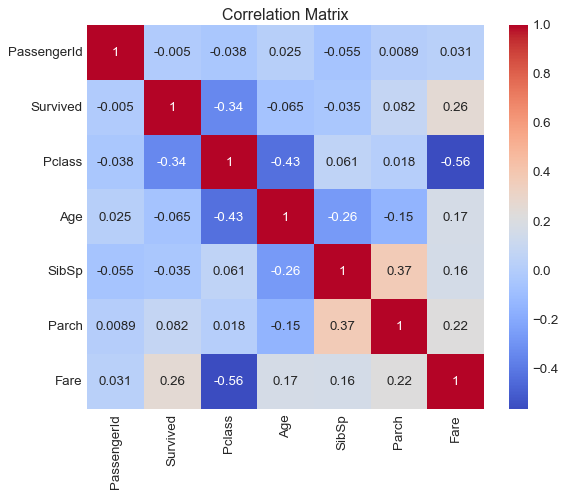

In [35]:
# your code here

corr_matrix = titanic.corr()

# Set the plot style to whitegrid
sns.set_style('whitegrid')

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Set the title of the plot
plt.title('Correlation Matrix')

# Show the plot
plt.show()

#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [2]:
# your code here



#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [3]:
# your code here

